In [2]:
# Importing library for transfer learning
import tensorflow_hub as hub

# Importing libraries for cnn
import cv2
import os
import PIL

# Importing libraries for neural network
import tensorflow as tf
from tensorflow import keras

# Importing librarie for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visulaization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = keras.Sequential([
    keras.layers.Lambda(lambda x: hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")(x),
                        input_shape=IMAGE_SHAPE+(3,))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
from google.colab import files
uploaded = files.upload()

Saving goldfish.jpg to goldfish (1).jpg


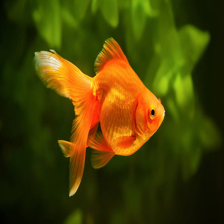

In [5]:
gold_fish = PIL.Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

array([[[ 3,  9,  0],
        [ 5, 11,  0],
        [ 6, 12,  0],
        ...,
        [18, 21,  0],
        [18, 21,  0],
        [18, 21,  0]],

       [[ 3,  9,  0],
        [ 5, 11,  0],
        [ 7, 12,  0],
        ...,
        [18, 21,  0],
        [18, 21,  0],
        [18, 21,  0]],

       [[ 3,  9,  0],
        [ 5, 11,  0],
        [ 7, 13,  1],
        ...,
        [18, 21,  0],
        [18, 21,  0],
        [18, 21,  0]],

       ...,

       [[ 3,  3,  1],
        [ 3,  3,  1],
        [ 3,  3,  1],
        ...,
        [12, 12,  2],
        [11, 11,  1],
        [ 9, 11,  0]],

       [[ 3,  3,  1],
        [ 3,  3,  1],
        [ 3,  3,  1],
        ...,
        [12, 12,  1],
        [11, 11,  1],
        [ 9, 11,  0]],

       [[ 2,  2,  0],
        [ 2,  2,  0],
        [ 3,  3,  1],
        ...,
        [12, 12,  0],
        [11, 11,  0],
        [ 9, 11,  0]]], dtype=uint8)
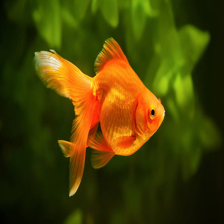

In [6]:
gold_fish = np.array(gold_fish)
gold_fish

In [7]:
gold_fish = np.array(gold_fish)/255
gold_fish

array([[[0.01176471, 0.03529412, 0.        ],
        [0.01960784, 0.04313725, 0.        ],
        [0.02352941, 0.04705882, 0.        ],
        ...,
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ]],

       [[0.01176471, 0.03529412, 0.        ],
        [0.01960784, 0.04313725, 0.        ],
        [0.02745098, 0.04705882, 0.        ],
        ...,
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ]],

       [[0.01176471, 0.03529412, 0.        ],
        [0.01960784, 0.04313725, 0.        ],
        [0.02745098, 0.05098039, 0.00392157],
        ...,
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ],
        [0.07058824, 0.08235294, 0.        ]],

       ...,

       [[0.01176471, 0.01176471, 0.00392157],
        [0.01176471, 0.01176471, 0.00392157],
        [0.01176471, 0

In [8]:
gold_fish.shape

(224, 224, 3)

In [9]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [10]:
classifier.predict(gold_fish[np.newaxis, ...])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[ 0.24867192,  2.1909895 , 11.039317  , ..., -1.494943  ,
        -0.9026129 ,  0.05752219]], dtype=float32)

In [11]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[ 0.24867192,  2.1909895 , 11.039317  , ..., -1.494943  ,
        -0.9026129 ,  0.05752219]], dtype=float32)

In [12]:
result.shape

(1, 1001)

In [13]:
np.argmax(result)

np.int64(2)

In [14]:
uploaded = files.upload()

Saving ImageNetLabels.txt to ImageNetLabels (1).txt


In [15]:
image_labels = []
with open('ImageNetLabels.txt', 'r') as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [16]:
#Wonderful we got the entire list of 1000 labels with us

In [17]:
image_labels[np.argmax(result)]

'goldfish'

In [18]:
# Our model predicted it correct "Hurrayyyyy"

In [19]:
# lets try it on another image as well.

In [20]:
uploaded = files.upload()

Saving download.jpeg to download (1).jpeg


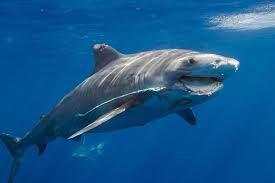

In [21]:
new_image = PIL.Image.open('download.jpeg')
new_image

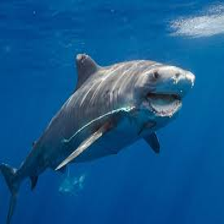

In [22]:
new_image = PIL.Image.open('download.jpeg').resize(IMAGE_SHAPE)
new_image

array([[[  0,  66, 134],
        [  0,  66, 134],
        [  0,  67, 135],
        ...,
        [ 17,  94, 151],
        [ 10,  90, 150],
        [ 14,  94, 153]],

       [[  1,  67, 135],
        [  1,  67, 135],
        [  1,  69, 136],
        ...,
        [ 12,  87, 143],
        [ 23, 101, 158],
        [ 19,  97, 154]],

       [[  2,  70, 138],
        [  2,  70, 138],
        [  3,  72, 139],
        ...,
        [ 40, 109, 161],
        [ 41, 114, 168],
        [ 36, 109, 163]],

       ...,

       [[  1,  60, 126],
        [  0,  61, 126],
        [  0,  62, 126],
        ...,
        [  2,  77, 144],
        [  2,  79, 145],
        [  1,  79, 145]],

       [[  1,  60, 125],
        [  0,  61, 125],
        [  0,  62, 125],
        ...,
        [  2,  77, 144],
        [  2,  79, 145],
        [  1,  79, 145]],

       [[  1,  61, 124],
        [  0,  61, 124],
        [  0,  62, 124],
        ...,
        [  2,  77, 144],
        [  2,  79, 145],
        [  1,  79, 145]]], dtype=uint8)
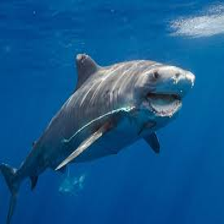

In [23]:
new_image = np.array(new_image)
new_image

In [24]:
new_image = np.array(new_image)/255
new_image

array([[[0.        , 0.25882353, 0.5254902 ],
        [0.        , 0.25882353, 0.5254902 ],
        [0.        , 0.2627451 , 0.52941176],
        ...,
        [0.06666667, 0.36862745, 0.59215686],
        [0.03921569, 0.35294118, 0.58823529],
        [0.05490196, 0.36862745, 0.6       ]],

       [[0.00392157, 0.2627451 , 0.52941176],
        [0.00392157, 0.2627451 , 0.52941176],
        [0.00392157, 0.27058824, 0.53333333],
        ...,
        [0.04705882, 0.34117647, 0.56078431],
        [0.09019608, 0.39607843, 0.61960784],
        [0.0745098 , 0.38039216, 0.60392157]],

       [[0.00784314, 0.2745098 , 0.54117647],
        [0.00784314, 0.2745098 , 0.54117647],
        [0.01176471, 0.28235294, 0.54509804],
        ...,
        [0.15686275, 0.42745098, 0.63137255],
        [0.16078431, 0.44705882, 0.65882353],
        [0.14117647, 0.42745098, 0.63921569]],

       ...,

       [[0.00392157, 0.23529412, 0.49411765],
        [0.        , 0.23921569, 0.49411765],
        [0.        , 0

In [25]:
result = classifier.predict(new_image[np.newaxis, ...])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[ 0.19718227,  0.80461884,  0.09137441, ..., -0.4363219 ,
        -0.01476443,  0.5834793 ]], dtype=float32)

In [26]:
# predicting whether it is a tiger shark or not
image_labels[np.argmax(result)]

'great white shark'

In [27]:
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [28]:
np.argmax(result)

np.int64(3)

In [29]:
# lets work on our flower dataset which we have worked on previous notebook, it is going to be same only, just for practise

In [30]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
data_dir

'./datasets/flower_photos'

In [31]:
import pathlib
data_dir = data_dir + '/flower_photos'
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [32]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/daisy/2482982436_a2145359e0_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/14816364517_2423021484_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/25360380_1a881a5648.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2476937534_21b285aa46_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2087343668_ef4fb95787_n.jpg')]

In [33]:
list(data_dir.glob('roses/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/15949087094_a8f565295c_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14683774134_6367640585.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2535466143_5823e48b63.jpg')]

In [34]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [35]:
roses = list(data_dir.glob('roses/*.jpg'))
roses

[PosixPath('datasets/flower_photos/flower_photos/roses/15949087094_a8f565295c_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15312360171_57bde98799_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14683774134_6367640585.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2535466143_5823e48b63.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3072908271_08764c732a_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2364976562_a184463083_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2215318403_06eb99176a.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14982802401_a3dfb22afb.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/505517255_cfbb6f6394.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/46841272

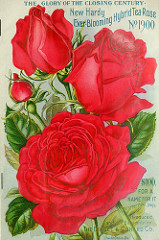

In [36]:
PIL.Image.open(roses[0])

In [37]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips

[PosixPath('datasets/flower_photos/flower_photos/tulips/6982913043_3b873c6a25.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/3516271083_fba63b5861.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/141479422_5a6fa1fd1b_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/14017640283_c417141832_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/2813649953_2b0f20fe94_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/135994133_4f306fe4bf_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/14066056226_d8564a083e_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/13910544560_9140dd547e.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/2430566689_8543552f9b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/7166618384_850905fc63_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/6931715360_34edc5a372_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/t

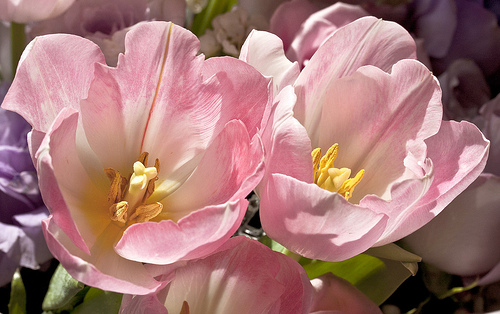

In [38]:
PIL.Image.open(tulips[0])

In [39]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'tulips' : list(data_dir.glob('tulips/*.jpg')),
    'daisy' : list(data_dir.glob('daisy/*.jpg')),
    'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers' : list(data_dir.glob('sunflowers/*.jpg'))
}

In [40]:
flower_label_dict ={
    'roses':0,
    'tulips':1,
    'daisy':2,
    'dandelion':3,
    'sunflowers':4
}

array([[[182, 204, 209],
        [187, 210, 212],
        [189, 212, 214],
        ...,
        [183, 210, 214],
        [183, 210, 214],
        [174, 201, 205]],

       [[183, 205, 210],
        [187, 210, 212],
        [188, 211, 213],
        ...,
        [185, 210, 214],
        [187, 212, 216],
        [181, 206, 210]],

       [[184, 207, 209],
        [187, 210, 212],
        [187, 210, 212],
        ...,
        [187, 209, 214],
        [188, 210, 215],
        [184, 206, 211]],

       ...,

       [[197, 221, 221],
        [170, 194, 192],
        [173, 196, 192],
        ...,
        [189, 210, 207],
        [192, 213, 210],
        [193, 214, 211]],

       [[196, 220, 220],
        [171, 195, 193],
        [175, 197, 195],
        ...,
        [187, 208, 205],
        [188, 211, 207],
        [186, 209, 205]],

       [[194, 218, 218],
        [169, 193, 193],
        [173, 195, 193],
        ...,
        [187, 210, 206],
        [180, 203, 199],
        [165, 190, 186]]], dtype=uint8)
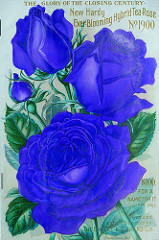

In [41]:
img = cv2.imread(flower_images_dict['roses'][0])
img

In [42]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [43]:
X, y = [], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flower_label_dict[flower_name])

In [44]:
x = np.array(X)
y = np.array(y)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [46]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

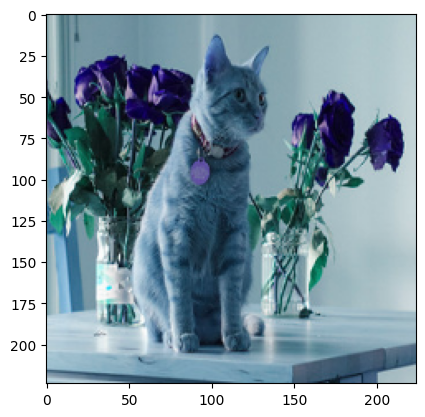

In [47]:
plt.imshow(x[1])

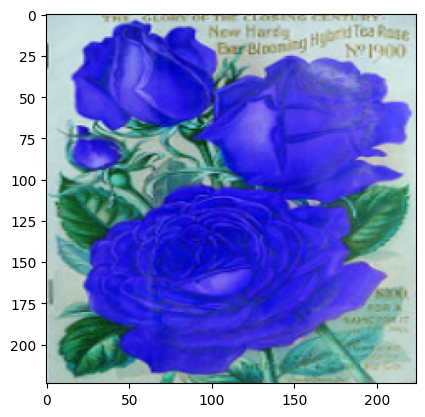

In [48]:
plt.imshow(x[0])

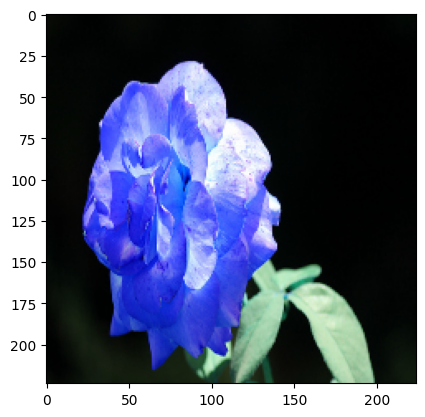

In [49]:
plt.imshow(x[2])

In [50]:
result = classifier.predict(np.array([x[0],x[1],x[2]]))
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[ 0.20168084, -0.19158123,  0.9688786 , ..., -1.1741406 ,
        -0.509613  ,  3.4743185 ],
       [ 0.31310418,  0.34297574,  1.0016185 , ..., -0.7754946 ,
        -2.653787  ,  3.7651703 ],
       [ 0.2393479 ,  0.15700556,  1.4279007 , ..., -1.5621486 ,
        -1.8221579 ,  3.1251519 ]], dtype=float32)

In [51]:
result = np.argmax(result, axis=1)
result

array([795, 722, 795])

In [52]:
image_labels[722]

'pillow'

In [53]:
image_labels[795]

'shower curtain'

In [54]:
# Now take pre-trained model and retrain it using flowers images

In [55]:
# only the last layer is changedd instaed of classification
# "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# so now I will freeze the other layers except the last one and will train, trainable = False

In [56]:
classifier = keras.Sequential([
    keras.layers.Lambda(lambda x: hub.KerasLayer(feature_extractor_model)(x), input_shape=(224,224,3), trainable=False),
    keras.layers.Dense(5, activation='softmax')
])

classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
classifier.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [59]:
classifier.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - acc: 0.5416 - loss: 1.1477
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - acc: 0.8665 - loss: 0.4141
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - acc: 0.8937 - loss: 0.3206
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - acc: 0.9136 - loss: 0.2813
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - acc: 0.9287 - loss: 0.2344


In [60]:
classifier.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - acc: 0.8700 - loss: 0.3801


[0.3631472587585449, 0.8779956698417664]